In [102]:
# Import necessary libraries
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read the Excel files into dataframes
file1 = pd.read_excel(r'C:\Users\Mk\Downloads\AXF-1 data (2) IGP.xlsx')
file2 = pd.read_excel(r'C:\Users\Mk\Downloads\AXF-1 data update 29APR25.xlsx')

# Align dataframes by columns and index (not by merging rows)
# This adds columns from file2 that are missing in file1
for col in file2.columns:
    if col not in file1.columns:
        file1[col] = file2[col]

# Save the updated dataframe
file1.to_csv(r'C:\Users\Mk\Downloads\merge_albotherm.csv', index=False)

print("✅ Data merging complete. File saved as 'merge_albotherm.csv'")

✅ Data merging complete. File saved as 'merge_albotherm.csv'


In [103]:
Albotherm.head()

,Column 1,Date of experiment,Aims & Hypothesis,Length of run (mins),Core used,Core Formulation,Core Viscosity (cP),Core Osmolarity,UV used,UV formulation,...,Shelf life,Notes,Experimental Write-up,Unnamed: 41,Unnamed: 42,Unnamed: 43,Vessel size (mL),Impellor,Spin Speed (rpm),Temperature of Outer Phase
0,AXF0032,2024-09-06,Test CaCl2 core,24,BNC00027,64/24/10/2 HPC/PDO/CaCl2/PEG550DMA,32000.0,2032.000000,BNU00019,AUF85,...,NaN,Cure rig 2.0,0,NaN,NaN,0,600,Medium 4x impellor,1030,27.1
1,AXF0033,2024-09-09,PEGless UV with PEG core: Aim is to screen whe...,45,BNC00023,66/26/6/2% PEG550DMA,52000.0,1878.000000,BNU00021,AUF85,...,NaN,Membrane was kept in air over the weekend,0,NaN,NaN,0,600,Medium 4x impellor,1050,27.1
2,AXF0034,2024-09-11,Aim is to try and make large caps (around 100u...,9,BNC00023,66/26/6/2% PEG550DMA,86400.0,1878.000000,BNU00022,AUF85,...,NaN,Membrane was kept in air over the weekend,0,NaN,NaN,0,600,Medium 4x impellor,1050,28.0
3,AXF0036,2024-09-13,OG core / AUF76 standard SotA run,47,BNC00024,OG (66/27/7),11250.0,1977.666667,BNU00023,AUF76,...,NaN,Caps were left in osmolarity matched Outer (BN...,0,NaN,NaN,0,600,Medium 4x impellor,275,23.1
4,AXF0046,2024-10-04,PEG-core & AUF76,51,BNC00031,66/25.5/6.5/2% PEG550DMA,18360.0,2016.250000,BNU00028,AUF76,...,NaN,Osmometer broken,0,NaN,NaN,0,600,Medium 4x impellor,900,27.1


In [106]:
Albotherm.columns

Index(['Column 1', 'Date of experiment', 'Aims & Hypothesis',
       'Length of run (mins)', 'Core used', 'Core Formulation',
       'Core Viscosity (cP)', 'Core Osmolarity', 'UV used', 'UV formulation',
       'UV viscosity (cP)', 'Emulsion viscosity (cP)',
       'Mass of emulsion used / g', 'Vessel, impellor and spin speed',
       'Outer used', 'Outer viscosity (cP)', 'Outer osmolarity',
       'Dispersed Flow Rate (mL/min)', 'Continuous Flow Rate (mL/min)',
       'Flow Rate Ratio', 'Cure Rig Used', 'Length of curing tubing (m)',
       'Temperature of Outer Phase at end of experiment / C',
       'UV Power (J s-1)', 'Curing Energy (kJ g-1)',
       'Droplet/particle size (µm)', 'Droplet/particle size range',
       'Droplet/particle size range STDEV', '% single core', '% empty',
       'Polydispersity Index', 'Yield (kg)',
       '% dry after 1h in outer phase (Quick Durability test)',
       '% dry after 24h in incubator', '% dry after 2 days 70% humidity',
       '% dry after 7

In [108]:
null_values = Albotherm.isna().sum()
print(null_values)

Column 1                                                   0
Date of experiment                                         0
Aims & Hypothesis                                          0
Length of run (mins)                                       0
Core used                                                  0
Core Formulation                                           0
Core Viscosity (cP)                                        0
Core Osmolarity                                            0
UV used                                                    0
UV formulation                                             0
UV viscosity (cP)                                          0
Emulsion viscosity (cP)                                    0
Mass of emulsion used / g                                  0
Vessel, impellor and spin speed                            0
Outer used                                                 0
Outer viscosity (cP)                                       0
Outer osmolarity        

In [110]:
Albotherm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 48 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Column 1                                               119 non-null    object        
 1   Date of experiment                                     119 non-null    datetime64[ns]
 2   Aims & Hypothesis                                      119 non-null    object        
 3   Length of run (mins)                                   119 non-null    object        
 4   Core used                                              119 non-null    object        
 5   Core Formulation                                       119 non-null    object        
 6   Core Viscosity (cP)                                    119 non-null    float64       
 7   Core Osmolarity                                        119 non-null    

In [112]:
# Now clean and fill missing values
data = Albotherm

# Fill missing values in 'Aims & Hypothesis' with 0
data['Aims & Hypothesis'] = data['Aims & Hypothesis'].fillna(0)

# Numeric columns: Fill with median for better handling of outliers
numeric_cols = [
    'Core Viscosity (cP)', 'UV viscosity (cP)', 'Emulsion viscosity (cP)',
    'Outer viscosity (cP)', 'UV Power (J s-1)', 'Curing Energy (kJ g-1)',
    'Droplet/particle size (µm)', 'Droplet/particle size range STDEV',
    '% single core', '% empty', 'Polydispersity Index',
    '% dry after 24h in incubator', '% dry after 2 days 70% humidity',
    'Transmission window',

    # Additional columns with missing values
    'Core Osmolarity', 'Mass of emulsion used / g', 'Outer osmolarity',
    'Temperature of Outer Phase at end of experiment / C',
    'Yield (kg)', '% dry after 1h in outer phase (Quick Durability test)',
    '% dry after 7 days 70% humidity', '% dry after 7 days outside',
    'Shelf life', 'Temperature of Outer Phase'
]

for col in numeric_cols:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].median())

# Categorical columns: Fill with mode
if 'Droplet/particle size range' in data.columns:
    data['Droplet/particle size range'] = data['Droplet/particle size range'].fillna(data['Droplet/particle size range'].mode()[0])
if 'Notes' in data.columns:
    data['Notes'] = data['Notes'].fillna(data['Notes'].mode()[0])

# Drop unnamed empty columns if present
unnamed_cols_to_drop = [col for col in data.columns if 'Unnamed:' in col]
data = data.drop(columns=unnamed_cols_to_drop)

# Save cleaned dataset
data.to_csv(r'C:\Users\Mk\Downloads\cleaned_albotherm.csv', index=False)
print("✅ Cleaned data saved as 'cleaned_albotherm.csv'")

# Check if any missing values remain
print("✅ Missing values remaining:\n", data.isnull().sum())

✅ Cleaned data saved as 'cleaned_albotherm.csv'
✅ Missing values remaining:
 Column 1                                                   0
Date of experiment                                         0
Aims & Hypothesis                                          0
Length of run (mins)                                       0
Core used                                                  0
Core Formulation                                           0
Core Viscosity (cP)                                        0
Core Osmolarity                                            0
UV used                                                    0
UV formulation                                             0
UV viscosity (cP)                                          0
Emulsion viscosity (cP)                                    0
Mass of emulsion used / g                                  0
Vessel, impellor and spin speed                            0
Outer used                                                 0
Outer vi

Pearson correlation coefficient: -0.032
P-value: 0.7257


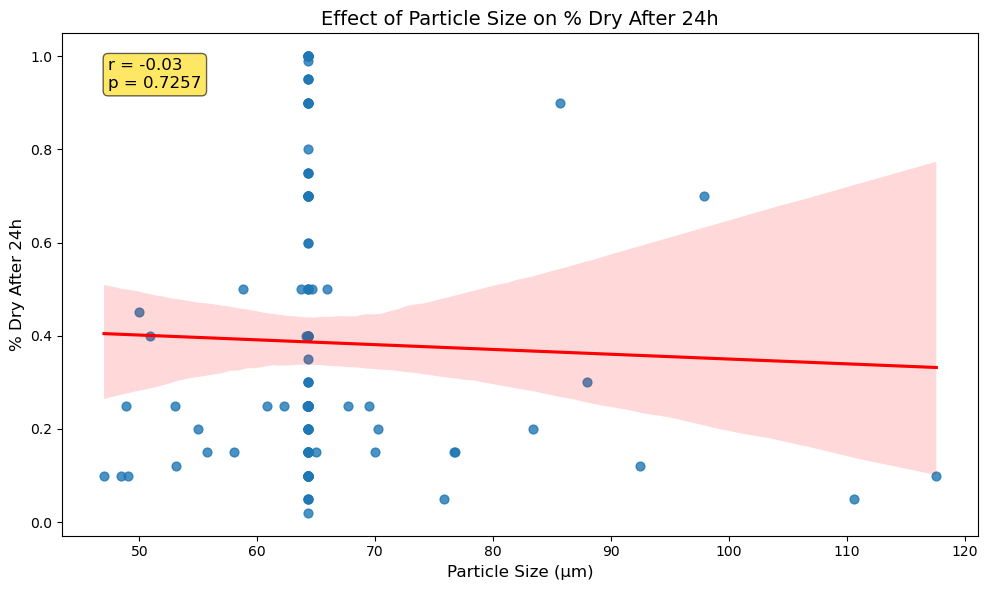

In [294]:
# Load your CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\Mk\Downloads\cleaned_albotherm.csv')

# Ensure relevant columns are numeric
df["Droplet/particle size (µm)"] = pd.to_numeric(df["Droplet/particle size (µm)"], errors="coerce")
df["% dry after 24h in incubator"] = pd.to_numeric(df["% dry after 24h in incubator"], errors="coerce")

# Drop missing values
df_clean = df.dropna(subset=["Droplet/particle size (µm)", "% dry after 24h in incubator"])

# Calculate Pearson correlation
corr, p_value = pearsonr(
    df_clean["Droplet/particle size (µm)"],
    df_clean["% dry after 24h in incubator"]
)

# Print the result
print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value:.4f}")

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_clean,
    x="Droplet/particle size (µm)",
    y="% dry after 24h in incubator",
    scatter_kws={'s': 40},
    line_kws={'color': 'red'}
)

# Add labels and title
plt.title("Effect of Particle Size on % Dry After 24h", fontsize=14)
plt.xlabel("Particle Size (µm)", fontsize=12)
plt.ylabel("% Dry After 24h", fontsize=12)

# Show correlation on plot
plt.text(
    0.05, 0.95,
    f"r = {corr:.2f}\np = {p_value:.4f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", facecolor="gold", alpha=0.6)
)

plt.tight_layout()
plt.show()

Pearson correlation coefficient: -0.156
P-value: 0.0908


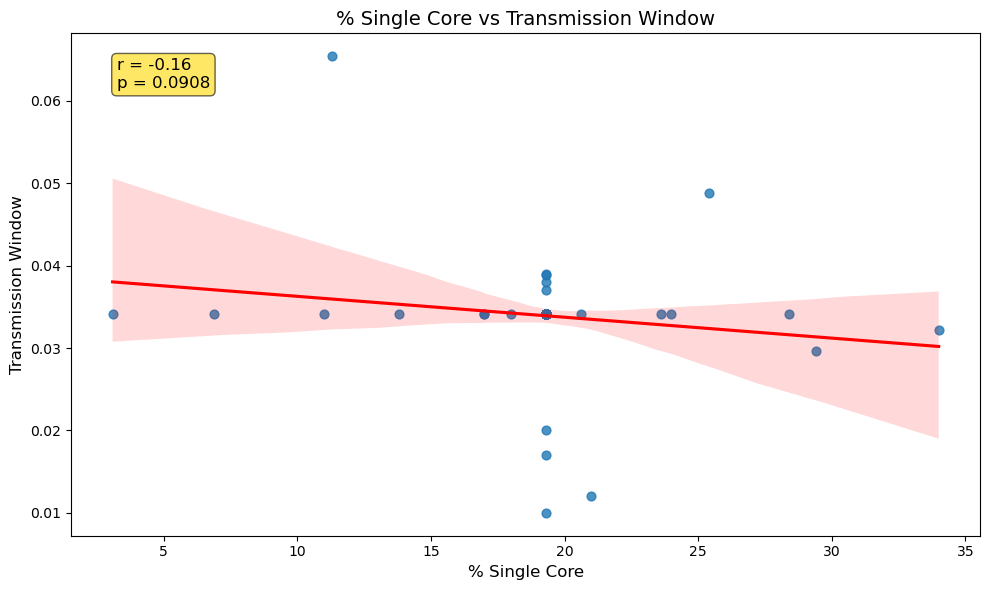

In [296]:
# Ensure relevant columns are numeric
df["% single core"] = pd.to_numeric(df["% single core"], errors="coerce")
df["Transmission window"] = pd.to_numeric(df["Transmission window"], errors="coerce")

# Drop missing values
df_clean = df.dropna(subset=["% single core", "Transmission window"])

# Calculate Pearson correlation
corr, p_value = pearsonr(
    df_clean["% single core"],
    df_clean["Transmission window"]
)

# Print correlation results
print(f"Pearson correlation coefficient: {corr:.3f}")
print(f"P-value: {p_value:.4f}")

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_clean,
    x="% single core",
    y="Transmission window",
    scatter_kws={'s': 40},
    line_kws={'color': 'red'}
)

# Add labels and title
plt.title("% Single Core vs Transmission Window", fontsize=14)
plt.xlabel("% Single Core", fontsize=12)
plt.ylabel("Transmission Window", fontsize=12)

# Annotate correlation result on plot
plt.text(
    0.05, 0.95,
    f"r = {corr:.2f}\np = {p_value:.4f}",
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle="round", facecolor="gold", alpha=0.6)
)

plt.tight_layout()
plt.show()

UV formulation with lowest % dry after 24h in incubator:
UV formulation                  AUF110
% dry after 24h in incubator      0.02
Transmission window             0.0341
Name: 68, dtype: object

UV formulation with highest transmission window:
UV formulation                   AUF76
% dry after 24h in incubator      0.05
Transmission window             0.0654
Name: 11, dtype: object



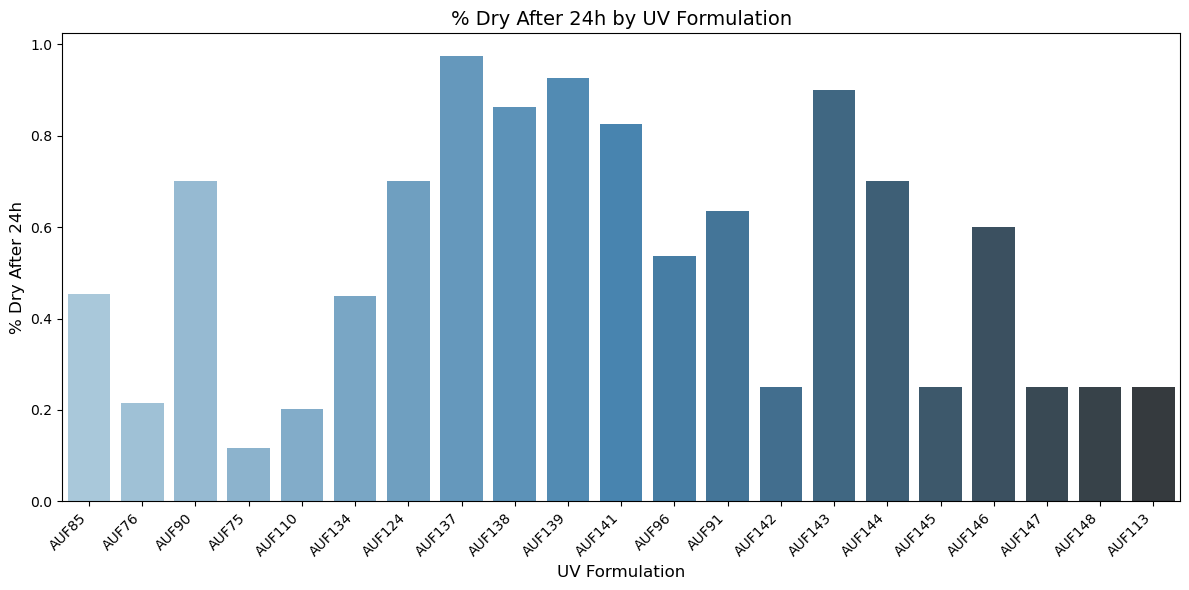

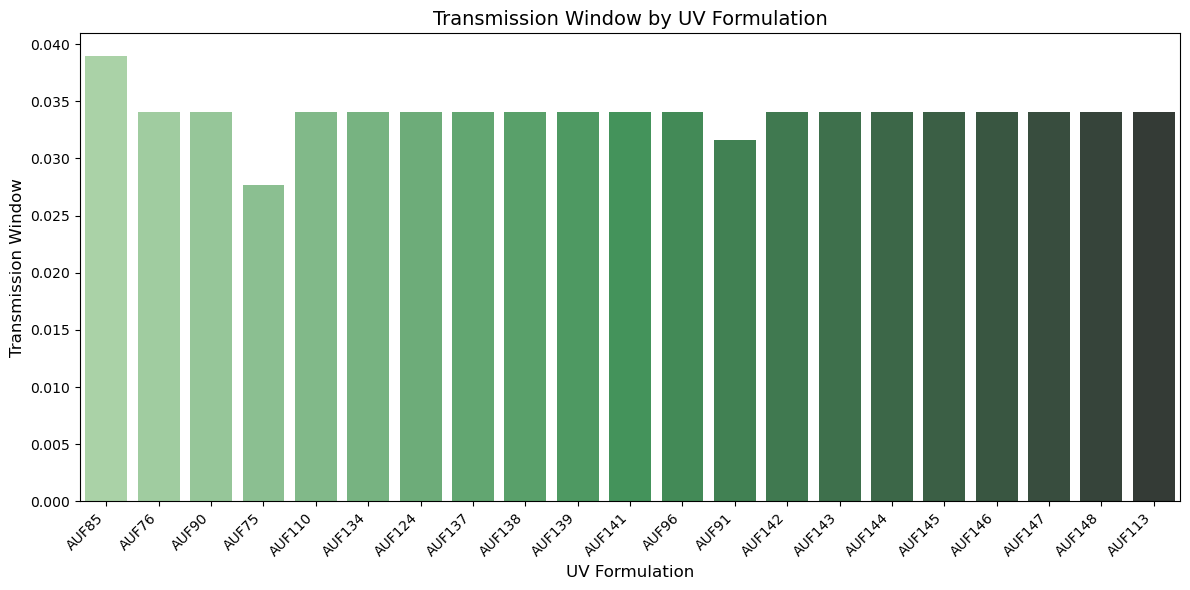

In [298]:
# Ensure columns are numeric
df["% dry after 24h in incubator"] = pd.to_numeric(df["% dry after 24h in incubator"], errors="coerce")
df["Transmission window"] = pd.to_numeric(df["Transmission window"], errors="coerce")

# Drop missing values
df_clean = df.dropna(subset=["UV formulation", "% dry after 24h in incubator", "Transmission window"])

# Find UV formulation with lowest % dry after 24h
lowest_dry = df_clean.loc[df_clean["% dry after 24h in incubator"].idxmin()]
print("UV formulation with lowest % dry after 24h in incubator:")
print(lowest_dry[["UV formulation", "% dry after 24h in incubator", "Transmission window"]])
print()

# Find UV formulation with highest transmission window
highest_trans = df_clean.loc[df_clean["Transmission window"].idxmax()]
print("UV formulation with highest transmission window:")
print(highest_trans[["UV formulation", "% dry after 24h in incubator", "Transmission window"]])
print()

# Plot: % Dry After 24h by UV Formulation
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_clean,
    x="UV formulation",
    y="% dry after 24h in incubator",
    ci=None,
    palette="Blues_d"
)
plt.xticks(rotation=45, ha="right")
plt.title("% Dry After 24h by UV Formulation", fontsize=14)
plt.ylabel("% Dry After 24h", fontsize=12)
plt.xlabel("UV Formulation", fontsize=12)
plt.tight_layout()
plt.show()

# Plot: Transmission Window by UV Formulation
plt.figure(figsize=(12, 6))
sns.barplot(
    data=df_clean,
    x="UV formulation",
    y="Transmission window",
    ci=None,
    palette="Greens_d"
)
plt.xticks(rotation=45, ha="right")
plt.title("Transmission Window by UV Formulation", fontsize=14)
plt.ylabel("Transmission Window", fontsize=12)
plt.xlabel("UV Formulation", fontsize=12)
plt.tight_layout()
plt.show()

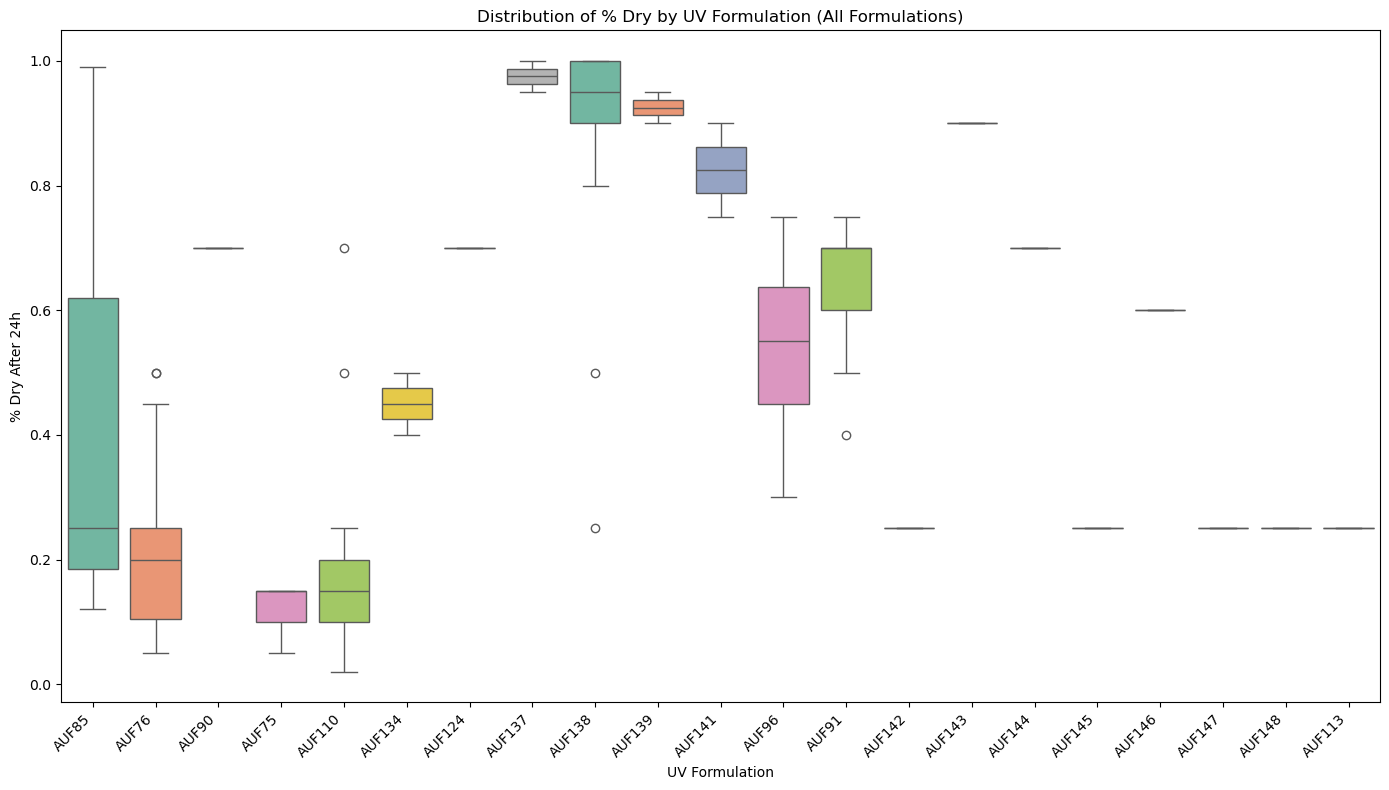

In [300]:
# Boxplot for ALL UV formulations
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_clean, x='UV formulation', y='% dry after 24h in incubator', 
            hue='UV formulation', palette='Set2', dodge=False, legend=False)
plt.title('Distribution of % Dry by UV Formulation (All Formulations)')
plt.xlabel('UV Formulation')
plt.ylabel('% Dry After 24h')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show ('boxplot_uv_formulations.png')
plt.close()

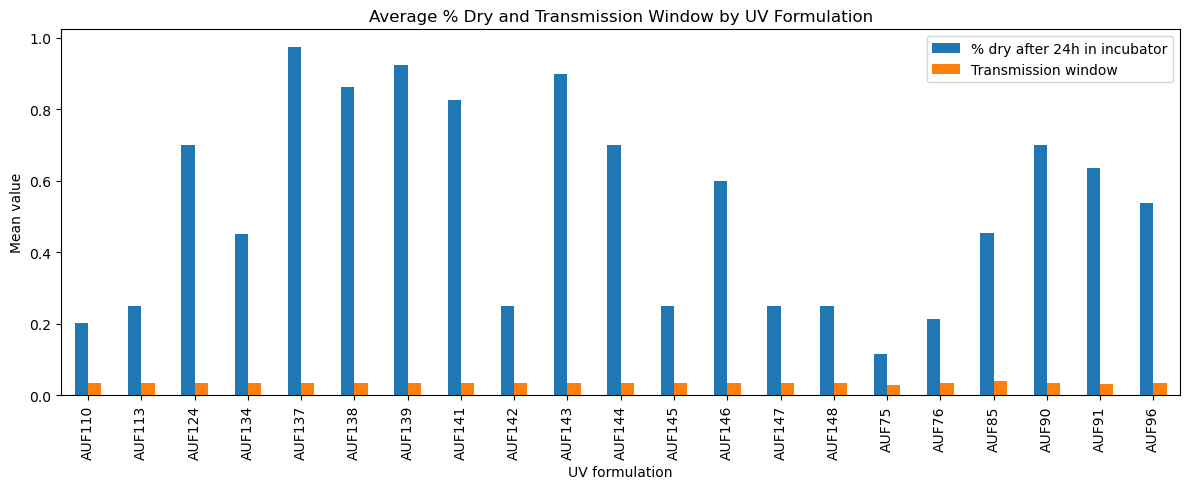

In [312]:
# Step 1: Ensure numeric columns are correct
df['% dry after 24h in incubator'] = pd.to_numeric(df['% dry after 24h in incubator'], errors='coerce')
df['Transmission window'] = pd.to_numeric(df['Transmission window'], errors='coerce')

# Step 2: Group by formulation and calculate mean
means = df.groupby('UV formulation')[['% dry after 24h in incubator', 'Transmission window']].mean()

# Step 3: Plot again
means.plot(kind='bar', figsize=(12, 5), title='Average % Dry and Transmission Window by UV Formulation')
plt.ylabel("Mean value")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [302]:
# Group by UV formulation and calculate mean for both columns
summary_stats = df_clean.groupby('UV formulation').agg({
    'Transmission window': 'mean',
    '% dry after 24h in incubator': 'mean'
}).reset_index()

# Sort by highest Transmission Window
top_transmission = summary_stats.sort_values(by='Transmission window', ascending=False)

# Sort by lowest % Dry
lowest_dry = summary_stats.sort_values(by='% dry after 24h in incubator')

# Display results
print("Top UV Formulations by Transmission Window:")
print(top_transmission[['UV formulation', 'Transmission window']].head(5))

print("\nUV Formulations with Lowest % Dry After 24h:")
print(lowest_dry[['UV formulation', '% dry after 24h in incubator']].head(5))

Top UV Formulations by Transmission Window:
   UV formulation  Transmission window
17          AUF85             0.039000
16          AUF76             0.034106
0          AUF110             0.034100
1          AUF113             0.034100
18          AUF90             0.034100

UV Formulations with Lowest % Dry After 24h:
   UV formulation  % dry after 24h in incubator
15          AUF75                      0.116667
0          AUF110                      0.201538
16          AUF76                      0.214259
1          AUF113                      0.250000
14         AUF148                      0.250000


In [308]:
# Convert columns to numeric
df["% dry after 24h in incubator"] = pd.to_numeric(df["% dry after 24h in incubator"], errors="coerce")
df["Transmission window"] = pd.to_numeric(df["Transmission window"], errors="coerce")

# Drop rows with missing values
df_clean = df.dropna(subset=["UV formulation", "% dry after 24h in incubator", "Transmission window"])

# Group by UV formulation and calculate the mean of each metric
summary = df_clean.groupby("UV formulation").agg({
    "% dry after 24h in incubator": "mean",
    "Transmission window": "mean"
}).reset_index()

# Sort by lowest % dry and highest transmission window
lowest_dry = summary.sort_values(by="% dry after 24h in incubator", ascending=True).head(5)
highest_transmission = summary.sort_values(by="Transmission window", ascending=False).head(5)

print("UV Formulations with Lowest % Dry After 24h:")
print(lowest_dry)

print("\n UV Formulations with Highest Transmission Window:")
print(highest_transmission)

UV Formulations with Lowest % Dry After 24h:
   UV formulation  % dry after 24h in incubator  Transmission window
15          AUF75                      0.116667             0.027700
0          AUF110                      0.201538             0.034100
16          AUF76                      0.214259             0.034106
1          AUF113                      0.250000             0.034100
14         AUF148                      0.250000             0.034100

 UV Formulations with Highest Transmission Window:
   UV formulation  % dry after 24h in incubator  Transmission window
17          AUF85                      0.453333             0.039000
16          AUF76                      0.214259             0.034106
0          AUF110                      0.201538             0.034100
1          AUF113                      0.250000             0.034100
18          AUF90                      0.700000             0.034100


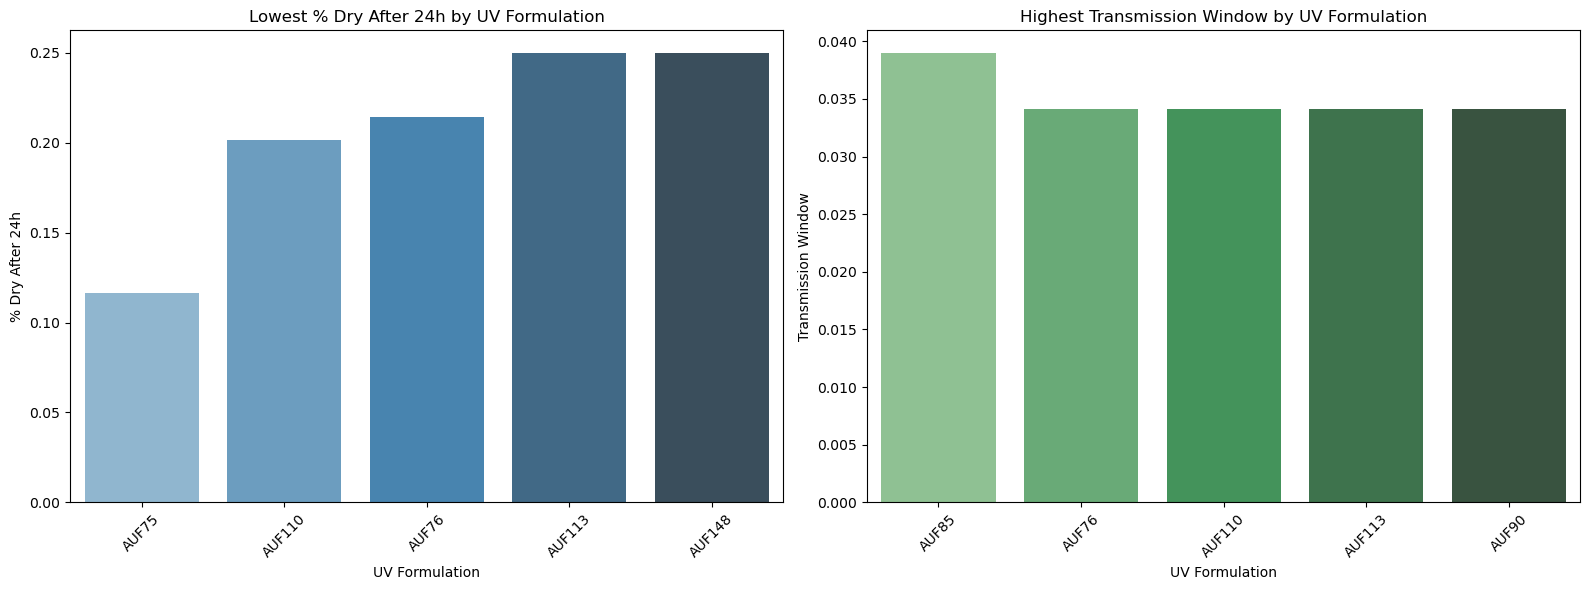

In [310]:
# Set up the figure
plt.figure(figsize=(16, 6))

# Barplot for lowest % dry after 24h
plt.subplot(1, 2, 1)
sns.barplot(
    data=lowest_dry,
    y="% dry after 24h in incubator",
    x="UV formulation",
    palette="Blues_d"
)
plt.xticks(rotation=45)
plt.title("Lowest % Dry After 24h by UV Formulation")
plt.ylabel("% Dry After 24h")
plt.xlabel("UV Formulation")

# Barplot for highest transmission window
plt.subplot(1, 2, 2)
sns.barplot(
    data=highest_transmission,
    y="Transmission window",
    x="UV formulation",
    palette="Greens_d"
)
plt.xticks(rotation=45)
plt.title("Highest Transmission Window by UV Formulation")
plt.ylabel("Transmission Window")
plt.xlabel("UV Formulation")

plt.tight_layout()
plt.show()

In [159]:
#Linear regression model of particle size and % dry after 24h
import statsmodels.api as sm

# Prepare the data
x = df_clean["Droplet/particle size (µm)"]
y = df_clean["% dry after 24h in incubator"]

# Add constant term to predictor
x_with_const = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x_with_const).fit()

# Print the summary
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     % dry after 24h in incubator   R-squared:                       0.001
Model:                                      OLS   Adj. R-squared:                 -0.007
Method:                           Least Squares   F-statistic:                    0.1237
Date:                          Mon, 05 May 2025   Prob (F-statistic):              0.726
Time:                                  06:48:41   Log-Likelihood:                 522.85
No. Observations:                           119   AIC:                            -1042.
Df Residuals:                               117   BIC:                            -1036.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

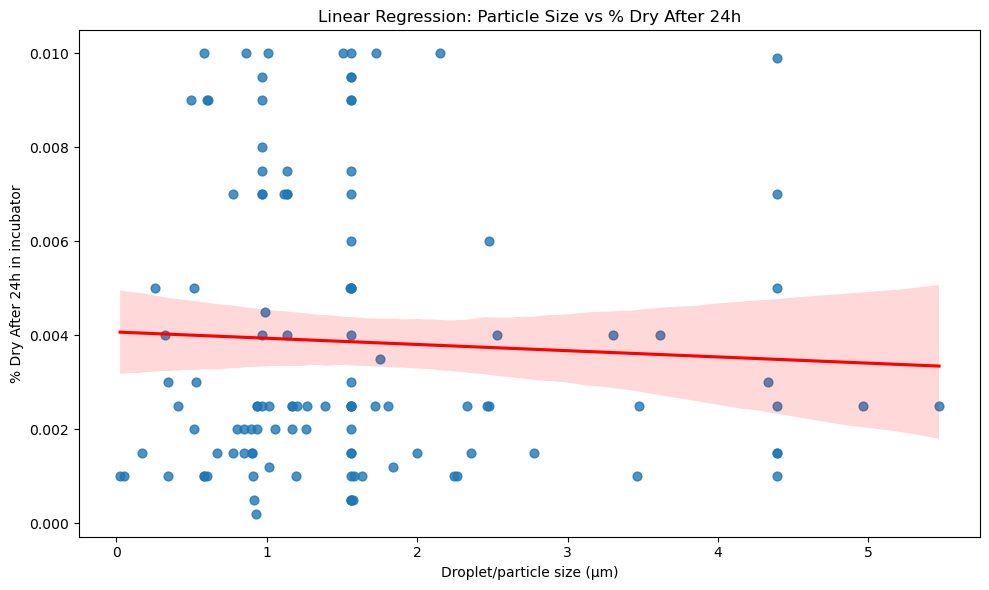

In [195]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x=x, y=y,
    scatter_kws={"s": 40},
    line_kws={"color": "red"},
)
plt.title("Linear Regression: Particle Size vs % Dry After 24h")
plt.xlabel("Droplet/particle size (µm)")
plt.ylabel("% Dry After 24h in incubator")
plt.tight_layout()
plt.show()

In [163]:
# Ensure numeric types and drop missing values
df["Curing Energy (kJ g-1)"] = pd.to_numeric(df["Curing Energy (kJ g-1)"], errors="coerce")
df["% dry after 24h in incubator"] = pd.to_numeric(df["% dry after 24h in incubator"], errors="coerce")

df_cure = df.dropna(subset=["Curing Energy (kJ g-1)", "% dry after 24h in incubator"])

# Define predictor and outcome
x = df_cure["Curing Energy (kJ g-1)"]
y = df_cure["% dry after 24h in incubator"]

# Add constant to predictor
x_with_const = sm.add_constant(x)

# Fit regression model
model = sm.OLS(y, x_with_const).fit()

# Display regression summary
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     % dry after 24h in incubator   R-squared:                       0.002
Model:                                      OLS   Adj. R-squared:                 -0.006
Method:                           Least Squares   F-statistic:                    0.2922
Date:                          Mon, 05 May 2025   Prob (F-statistic):              0.590
Time:                                  06:52:42   Log-Likelihood:                 522.93
No. Observations:                           119   AIC:                            -1042.
Df Residuals:                               117   BIC:                            -1036.
Df Model:                                     1                                         
Covariance Type:                      nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------

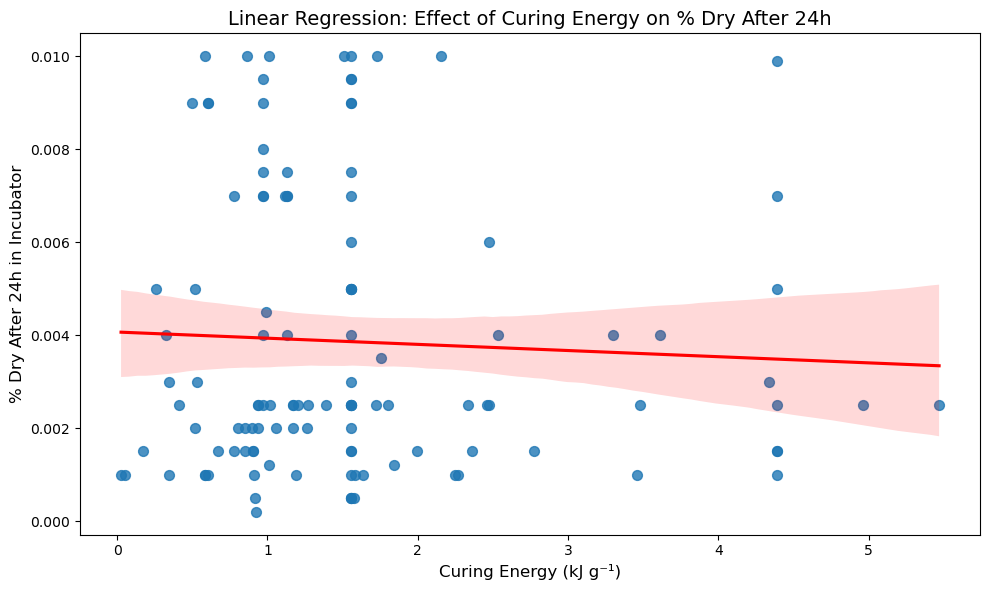

In [266]:
# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_cure,
    x="Curing Energy (kJ g-1)",
    y="% dry after 24h in incubator",
    scatter_kws={'s': 50},
    line_kws={'color': 'red'}
)

# Labels and title
plt.title("Linear Regression: Effect of Curing Energy on % Dry After 24h", fontsize=14)
plt.xlabel("Curing Energy (kJ g⁻¹)", fontsize=12)
plt.ylabel("% Dry After 24h in Incubator", fontsize=12)
plt.tight_layout()
plt.show()

In [167]:
# multiple linear regression
# Convert relevant columns to numeric, coercing errors
df["Droplet/particle size (µm)"] = pd.to_numeric(df["Droplet/particle size (µm)"], errors="coerce")
df["Curing Energy (kJ g-1)"] = pd.to_numeric(df["Curing Energy (kJ g-1)"], errors="coerce")
df["% dry after 24h in incubator"] = pd.to_numeric(df["% dry after 24h in incubator"], errors="coerce")

# Drop rows with missing values in any of the relevant columns
df_mlr = df.dropna(subset=["Droplet/particle size (µm)", "Curing Energy (kJ g-1)", "% dry after 24h in incubator"])

# Define predictor variables (X) and response variable (y)
X = df_mlr[["Droplet/particle size (µm)", "Curing Energy (kJ g-1)"]]
y = df_mlr["% dry after 24h in incubator"]

# Add constant term to predictor matrix
X = sm.add_constant(X)

# Fit the multiple linear regression model
mlr_model = sm.OLS(y, X).fit()

# Show regression summary
print(mlr_model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     % dry after 24h in incubator   R-squared:                       0.004
Model:                                      OLS   Adj. R-squared:                 -0.013
Method:                           Least Squares   F-statistic:                    0.2294
Date:                          Mon, 05 May 2025   Prob (F-statistic):              0.795
Time:                                  07:05:58   Log-Likelihood:                 523.02
No. Observations:                           119   AIC:                            -1040.
Df Residuals:                               116   BIC:                            -1032.
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

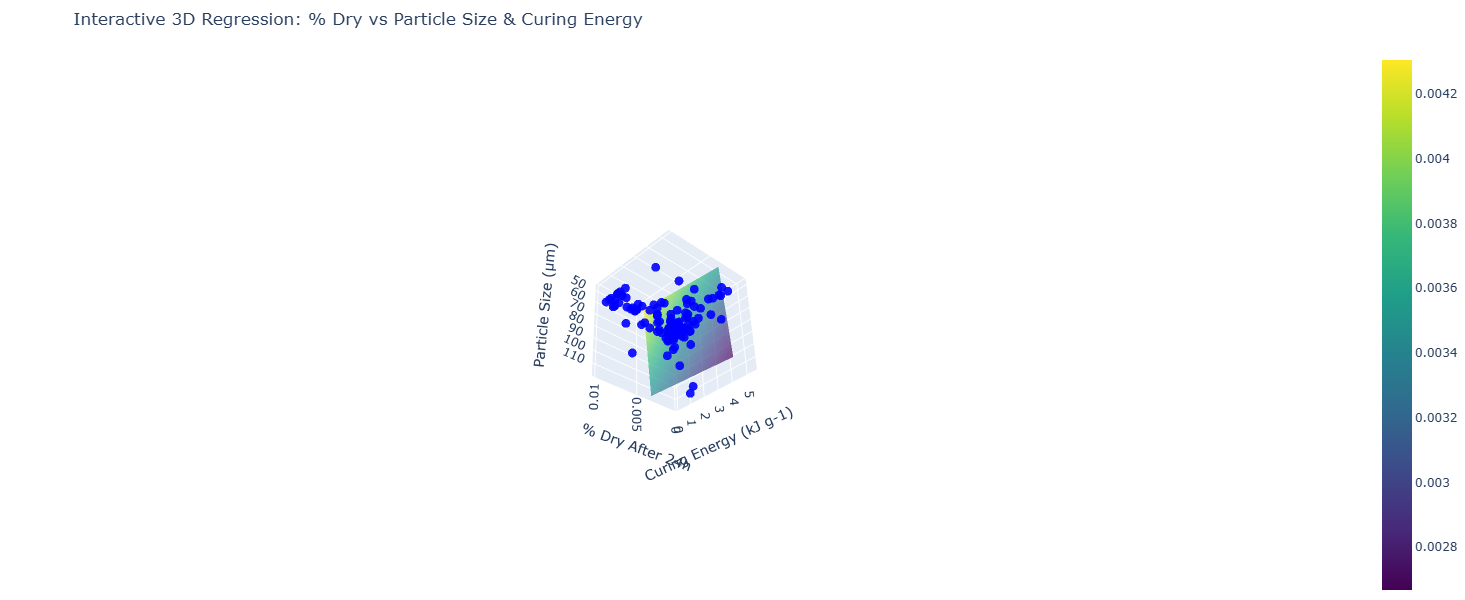

In [263]:
import plotly.graph_objs as go
import plotly.io as pio

# Prepare grid
x_range = np.linspace(df_mlr["Droplet/particle size (µm)"].min(), df_mlr["Droplet/particle size (µm)"].max(), 30)
y_range = np.linspace(df_mlr["Curing Energy (kJ g-1)"].min(), df_mlr["Curing Energy (kJ g-1)"].max(), 30)
x_grid, y_grid = np.meshgrid(x_range, y_range)

# Predict Z (response surface)
z_grid = (mlr_model.params[0]
          + mlr_model.params[1] * x_grid
          + mlr_model.params[2] * y_grid)

# Create surface plot (regression plane)
surface = go.Surface(
    x=x_grid,
    y=y_grid,
    z=z_grid,
    colorscale='Viridis',
    opacity=0.7,
    showscale=True,
    name='Regression Plane'
)

# Create scatter plot (data points)
scatter = go.Scatter3d(
    x=df_mlr["Droplet/particle size (µm)"],
    y=df_mlr["Curing Energy (kJ g-1)"],
    z=df_mlr["% dry after 24h in incubator"],
    mode='markers',
    marker=dict(size=5, color='blue', opacity=0.9),
    name='Observed Data'
)

# Layout
layout = go.Layout(
    title="Interactive 3D Regression: % Dry vs Particle Size & Curing Energy",
    scene=dict(
        xaxis=dict(title='Particle Size (µm)'),
        yaxis=dict(title='Curing Energy (kJ g-1)'),
        zaxis=dict(title='% Dry After 24h')
    ),
    margin=dict(l=0, r=0, b=0, t=50),
    width=800,
    height=600
)

# Show figure
fig = go.Figure(data=[surface, scatter], layout=layout)
fig.show()
#pio.write_html(fig, file="interactive_mlr_plot.html", auto_open=True)

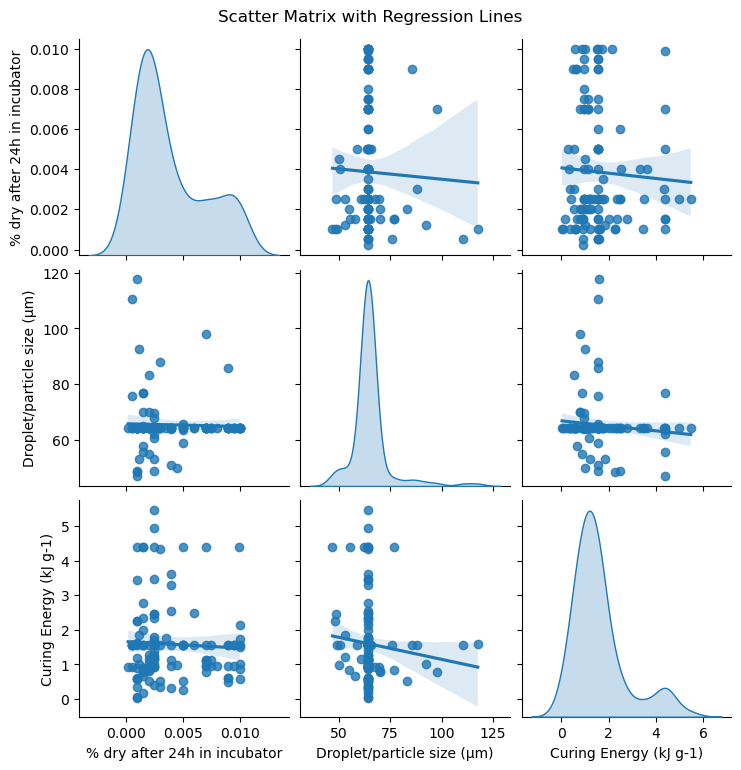

In [171]:
# Create pairplot for visual inspection
sns.pairplot(df_mlr[["% dry after 24h in incubator", "Droplet/particle size (µm)", "Curing Energy (kJ g-1)"]],
             kind='reg', diag_kind='kde')
plt.suptitle("Scatter Matrix with Regression Lines", y=1.02)
plt.show()

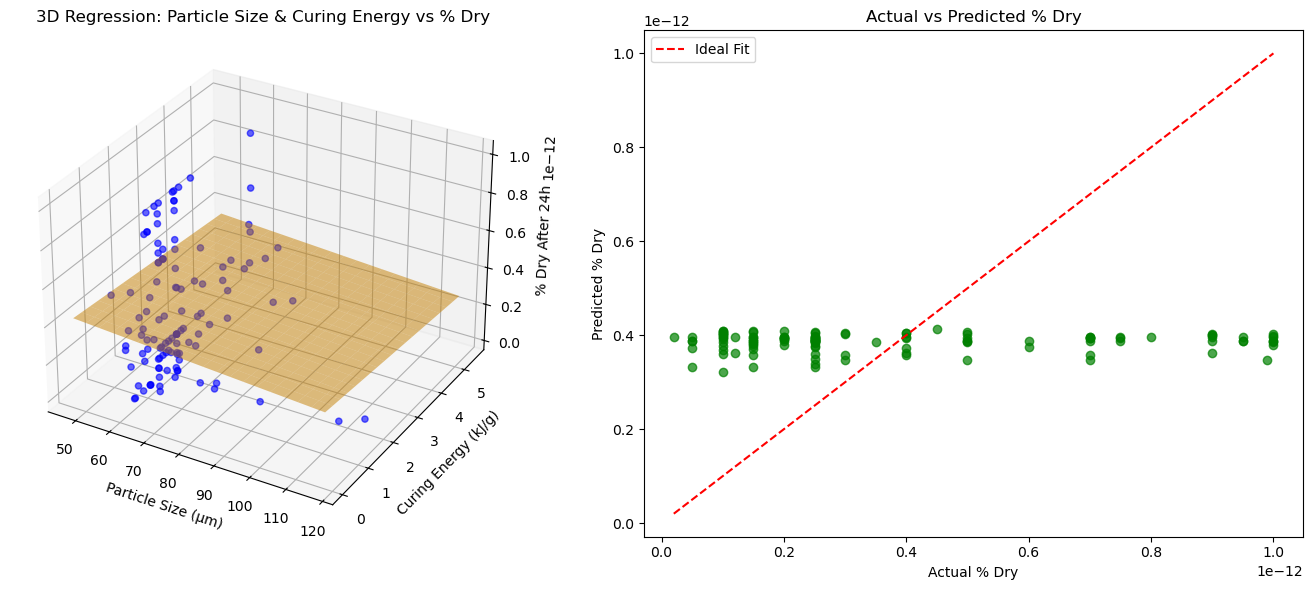

                                 OLS Regression Results                                 
Dep. Variable:     % dry after 24h in incubator   R-squared:                       0.004
Model:                                      OLS   Adj. R-squared:                 -0.013
Method:                           Least Squares   F-statistic:                    0.2294
Date:                          Mon, 05 May 2025   Prob (F-statistic):              0.795
Time:                                  11:33:00   Log-Likelihood:                 3263.1
No. Observations:                           119   AIC:                            -6520.
Df Residuals:                               116   BIC:                            -6512.
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [243]:
# Select and clean relevant columns
df["Droplet/particle size (µm)"] = pd.to_numeric(df["Droplet/particle size (µm)"], errors="coerce")
df["Curing Energy (kJ g-1)"] = pd.to_numeric(df["Curing Energy (kJ g-1)"], errors="coerce")
df["% dry after 24h in incubator"] = pd.to_numeric(df["% dry after 24h in incubator"], errors="coerce")

df_clean = df.dropna(subset=["Droplet/particle size (µm)", "Curing Energy (kJ g-1)", "% dry after 24h in incubator"])

# Define predictors and response
X = df_clean[["Droplet/particle size (µm)", "Curing Energy (kJ g-1)"]]
y = df_clean["% dry after 24h in incubator"]

# Add constant for intercept
X_const = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X_const).fit()
df_clean["Predicted % dry"] = model.predict(X_const)

# 3D Plot
fig = plt.figure(figsize=(14, 6))

# --- 1: 3D scatter with regression plane ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
x1 = df_clean["Droplet/particle size (µm)"]
x2 = df_clean["Curing Energy (kJ g-1)"]
y_actual = df_clean["% dry after 24h in incubator"]
y_pred = df_clean["Predicted % dry"]

# Scatter plot
ax1.scatter(x1, x2, y_actual, c='blue', label='Actual', alpha=0.6)

# Create meshgrid for plane
x_surf, y_surf = np.meshgrid(np.linspace(x1.min(), x1.max(), 20), 
                             np.linspace(x2.min(), x2.max(), 20))
z_surf = model.params[0] + model.params[1]*x_surf + model.params[2]*y_surf
ax1.plot_surface(x_surf, y_surf, z_surf, color='orange', alpha=0.5, label='Regression Plane')

ax1.set_xlabel("Particle Size (µm)")
ax1.set_ylabel("Curing Energy (kJ/g)")
ax1.set_zlabel("% Dry After 24h")
ax1.set_title("3D Regression: Particle Size & Curing Energy vs % Dry")

# --- 2: Actual vs Predicted plot ---
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(y_actual, y_pred, alpha=0.7, color='green')
ax2.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', label='Ideal Fit')
ax2.set_xlabel("Actual % Dry")
ax2.set_ylabel("Predicted % Dry")
ax2.set_title("Actual vs Predicted % Dry")
ax2.legend()

plt.tight_layout()
plt.show()

# Print summary
print(model.summary())

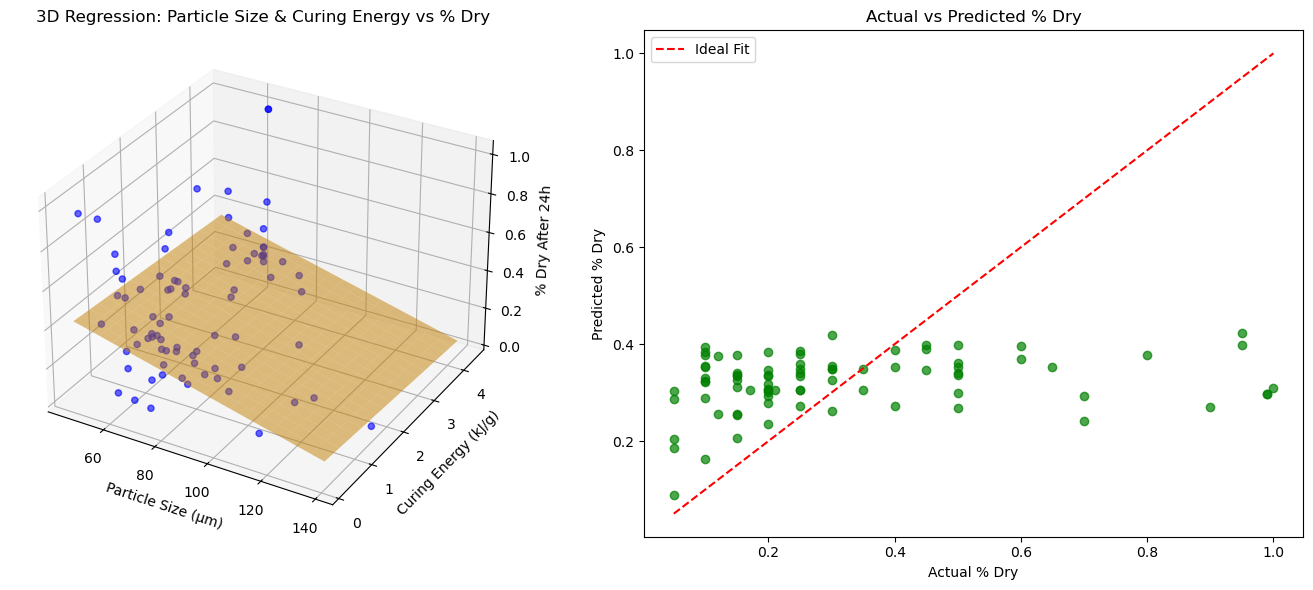

                                 OLS Regression Results                                 
Dep. Variable:     % dry after 24h in incubator   R-squared:                       0.056
Model:                                      OLS   Adj. R-squared:                  0.032
Method:                           Least Squares   F-statistic:                     2.304
Date:                          Mon, 05 May 2025   Prob (F-statistic):              0.107
Time:                                  11:42:51   Log-Likelihood:                0.17008
No. Observations:                            81   AIC:                             5.660
Df Residuals:                                78   BIC:                             12.84
Df Model:                                     2                                         
Covariance Type:                      nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------

In [249]:
df = pd.read_excel(r'C:\Users\Mk\Downloads\AXF-1 data update 29APR25.xlsx')

# Select and clean relevant columns
df["Droplet/particle size (µm)"] = pd.to_numeric(df["Droplet/particle size (µm)"], errors="coerce")
df["Curing Energy (kJ g-1)"] = pd.to_numeric(df["Curing Energy (kJ g-1)"], errors="coerce")
df["% dry after 24h in incubator"] = pd.to_numeric(df["% dry after 24h in incubator"], errors="coerce")

df_clean = df.dropna(subset=["Droplet/particle size (µm)", "Curing Energy (kJ g-1)", "% dry after 24h in incubator"])

# Define predictors and response
X = df_clean[["Droplet/particle size (µm)", "Curing Energy (kJ g-1)"]]
y = df_clean["% dry after 24h in incubator"]

# Add constant for intercept
X_const = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X_const).fit()
df_clean["Predicted % dry"] = model.predict(X_const)

# 3D Plot
fig = plt.figure(figsize=(14, 6))

# --- 1: 3D scatter with regression plane ---
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
x1 = df_clean["Droplet/particle size (µm)"]
x2 = df_clean["Curing Energy (kJ g-1)"]
y_actual = df_clean["% dry after 24h in incubator"]
y_pred = df_clean["Predicted % dry"]

# Scatter plot
ax1.scatter(x1, x2, y_actual, c='blue', label='Actual', alpha=0.6)

# Create meshgrid for plane
x_surf, y_surf = np.meshgrid(np.linspace(x1.min(), x1.max(), 20), 
                             np.linspace(x2.min(), x2.max(), 20))
z_surf = model.params[0] + model.params[1]*x_surf + model.params[2]*y_surf
ax1.plot_surface(x_surf, y_surf, z_surf, color='orange', alpha=0.5, label='Regression Plane')

ax1.set_xlabel("Particle Size (µm)")
ax1.set_ylabel("Curing Energy (kJ/g)")
ax1.set_zlabel("% Dry After 24h")
ax1.set_title("3D Regression: Particle Size & Curing Energy vs % Dry")

# --- 2: Actual vs Predicted plot ---
ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(y_actual, y_pred, alpha=0.7, color='green')
ax2.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], 'r--', label='Ideal Fit')
ax2.set_xlabel("Actual % Dry")
ax2.set_ylabel("Predicted % Dry")
ax2.set_title("Actual vs Predicted % Dry")
ax2.legend()

plt.tight_layout()
plt.show()

# Print summary
print(model.summary())